In [16]:
# %pip install blimpy
# %pip install setigen
# %pip install hdf5plugin
# %pip install h5py
# %pip install h5py
# %pip install torchvision
# %pip install transformers
# %pip install torch
# %pip install ultralytics

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import blimpy as bl
#from ultralytics import YOLO
import time
import os
import random
import psutil
%matplotlib inline

In [18]:
df = pd.read_csv('/home/cgchoza/galaxies/complete_cadences_catalog.csv')
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
36553,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36554,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36555,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36556,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [19]:
high_res_path = df['.h5 path'].iloc[-1]
mid_res_path = high_res_path.replace('0000.h5', '0002.h5')
print(high_res_path)
print(mid_res_path)

/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0002.h5


In [20]:
# fb_mid = bl.Waterfall(mid_res_path)
# mid_data = fb_mid.data # shape: (279; 1; 65,536)
# plt.imshow(10*np.log10(mid_data).squeeze(), aspect='auto')
# #plt.xlim(1125.13, 1125.14)
# plt.show()

In [21]:
# fb_high = bl.Waterfall(high_res_path)
# high_data = fb_high.data # shape: (16; 1; 67,108,864)
# plt.imshow(10*np.log10(high_data).squeeze(), aspect='auto')
# #plt.xlim(1125.13, 1125.14)
# plt.show()

In [22]:
df['.h5 path'] = df['.h5 path'].str.replace('0000.h5', '0002.h5', regex=False)
df = df.drop_duplicates(subset='.h5 path', keep='first').reset_index(drop=True)
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
30309,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
30310,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
30311,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
30312,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [23]:
df = df[~df['.h5 path'].str.contains('spliced')].reset_index(drop=True)
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
1,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
2,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
3,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
4,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
...,...,...,...,...,...,...,...,...
29341,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
29342,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
29343,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
29344,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [24]:
import cv2

img = cv2.imread("/datax/scratch/jliang/dataset/images/train/img_31693.jpg")
height, width, channels = img.shape

print(f"Width: {width}, Height: {height}, Channels: {channels}")


Width: 781, Height: 524, Channels: 3


In [25]:
# fb_mid.info() # shape: (279; 1; 65,536)

In [26]:
# fb_high.info() # shape: (16; 1; 67,108,864)

In [27]:
def overlaps_existing(x_center, width, used_intervals):
    x_min = x_center - width / 2
    x_max = x_center + width / 2
    for (xmin_used, xmax_used) in used_intervals:
        if not (x_max <= xmin_used or x_min >= xmax_used):  # overlap detected
            return True
    return False

In [28]:
small_df = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [29]:
# Shuffle and split
total_indices = list(range(len(small_df)))
random.seed(42)
random.shuffle(total_indices)

split_idx = int(0.8 * len(total_indices))
train_indices = set(total_indices[:split_idx])
val_indices = set(total_indices[split_idx:])

# Create all needed dirs
base_dir = '/datax/scratch/jliang/small_dataset2'
image_train_dir = os.path.join(base_dir, 'train/images')
label_train_dir = os.path.join(base_dir, 'train/labels')
image_val_dir = os.path.join(base_dir, 'val/images')
label_val_dir = os.path.join(base_dir, 'val/labels')

drifts = []
widths = []
for d in [image_train_dir, label_train_dir, image_val_dir, label_val_dir]:
    os.makedirs(d, exist_ok=True)

for index in range(len(df) - 1, len(df)):
    # Wait for memory if needed
    threshold = 20 * (1024 ** 3)  # 20 GB
    while psutil.virtual_memory().available < threshold:
        print('Waiting for memory to free up…')
        time.sleep(180)
    
    dat = df['.dat path'].iloc[index]
    dat_df = pd.read_table(dat, sep='\s+', names=[
            'Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency',
            'Corrected_Frequency','Index','freq_start','freq_end',
            'SEFD','SEFD_freq','Coarse_Channel_Number','Full_number_of_hits'
            ], skiprows=9)
    
    if len(dat_df) != 0:
        file_path = df['.h5 path'].iloc[index]
        print(f'Processing file {index}: {file_path}')
        fb = bl.Waterfall(file_path)
        data = fb.data  # shape: (279, 1, 65536)

        # Choose correct folder based on split
        if index in train_indices:
            image_dir = image_train_dir
            label_dir = label_train_dir
        else:
            image_dir = image_val_dir
            label_dir = label_val_dir
        # Save image
        img_name = f'img_{index:05d}.jpg' # change later to 5d
        out_path = os.path.join(image_dir, img_name)
        fig, ax = plt.subplots(figsize=(6.4, 6.4), dpi=100)
        ax.imshow(10 * np.log10(data).squeeze(), aspect='auto', cmap='viridis')
        ax.axis('off')                         # removes ticks and axis lines
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # no margins
        plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        # Save labels
        label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
        with open(label_path, 'w') as f:

            img_height, img_width = data.squeeze().shape

            # hits
            for _, row in dat_df.iterrows():
                x_min = row['freq_start']
                x_max = row['freq_end']
                if x_max - x_min == 0:
                    x_max = x_min + row['Drift_Rate'] * 1e-6 * 300  # Adjust width if zero
                y_min = 0
                y_max = img_height

                x_center = (x_min + x_max) / 2 / img_width
                y_center = (y_min + y_max) / 2 / img_height
                pixel = 1 / img_width
                width = max((x_max - x_min) / img_width, pixel)
                height = (y_max - y_min) / img_height

                drifts.append(row['Drift_Rate'])
                widths.append(width)

                f.write(f"0 {x_center:.8f} {y_center:.8f} {width:.8f} {height:.8f}\n")

Processing file 29345: /datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0002.h5


<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_214079/1845082461.py:30: SyntaxWarning: invalid escape sequence '\s'
  dat_df = pd.read_table(dat, sep='\s+', names=[


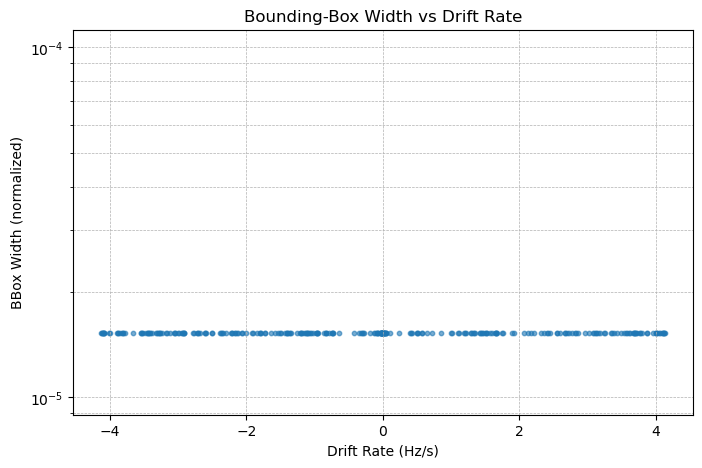

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(drifts, widths, s=10, alpha=0.6)
plt.xlabel('Drift Rate (Hz/s)')
plt.ylabel('BBox Width (normalized)')
plt.title('Bounding-Box Width vs Drift Rate')
plt.yscale('log')       # optional: log-scale if widths span many orders
plt.grid(True, which='both', ls='--', lw=0.5)
out_plot = 'bbox_width_vs_drift.png'
plt.savefig(out_plot, dpi=150, bbox_inches='tight')
plt.show()
